# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнила студентка гр. 9382 Круглова Виктория, вариант 26.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \to \infty$

## Основные теоретические положения
Линейная однородная система дифференциальных уравнений
$
    X'=A(t)X, A(t+T) = A(t), t \geqslant 0 (1)
$
называется линейной однородной системой с периодическими коэффициентами.

Матрица $\Phi(t)={\phi_{ij}, i,j=1,2...n}$ для системы (1) называется фундаментальной, если все ее столбцы являются линейно независимыми решениями системы.

Матрица $C$, для которой справедливо $\Phi(t + T) = \Phi(t)C, \forall t \geqslant 0$, является основной для фундаментальной матрицы $\Phi(t)$.

Спектральный радиус матрицы $A$ - это максимальное по модулю собственное число матрицы $A$. $p(A) = \max{|\lambda_i|}, i=1..n$

## Постановка задачи

Дано дифференциальное уравнение:
$x'' + a(p,t)x = 0, a(p,t) = p + b(t), b(t+T) = b(t)$
где p - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$
\begin{cases}
    u_1'=u_2 \\
    u_2'=-a(p,t)u_1 \\
\end{cases}
$

Здесь $u_1(t) = x(t), u_2(t) = x'(t)$

Необходимо провести исследование устойчивости однородного линейного уравнения.

## Выполнение работы

Вариант 26. Дана функция $b(t) = cos^2(sin(t))$ с периодом $T =\pi$.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

v_1 = [1,0]
v_2 = [0,1]
T = np.pi
a_t = np.arange(0, T, 0.001)
array_of_p = np.arange(0.1, 5, 0.05)
r = []

for p in array_of_p:
    f = lambda x, t: [x[1], -(p + np.power(np.cos(np.sin(t)),2))*x[0]]
    # в ode1, ode2 решения задачи Коши
    ode1 = odeint(f, v_1, a_t)
    ode2 = odeint(f, v_2, a_t)
    # матрица С
    C = np.matrix([ode1[-1], ode2[-1]]).transpose()
    # нахождение спектрального радиуса
    # взяты значения с 4 знаками после запятой, чтобы исключить малые колебания
    radius = np.around(np.max(np.abs(np.linalg.eigvals(C))),4)
    r.append(radius)
    
pintervals = []
isIntervalStart = True
# нахождение интервалов неустойчивости
for i in range(len(r)):
    if isIntervalStart == True and r[i] > 1:
        pintervals.append(array_of_p[i-1])
        isIntervalStart = False
    elif isIntervalStart == False and r[i] <= 1:
        pintervals.append(array_of_p[i])
        isIntervalStart = True
    
print("Получаем интервалы неустойчивости: \n(",pintervals[0],",",pintervals[1],") и (",pintervals[2],",",pintervals[3],")")

Получаем интервалы неустойчивости: 
( 0.20000000000000004 , 0.6000000000000002 ) и ( 3.350000000000001 , 3.450000000000001 )


Таким образом система не устойчива на двух интервалах. 

Рассмотрим зависимость спектрального адреса $r(p)$ от параметра p на графике:

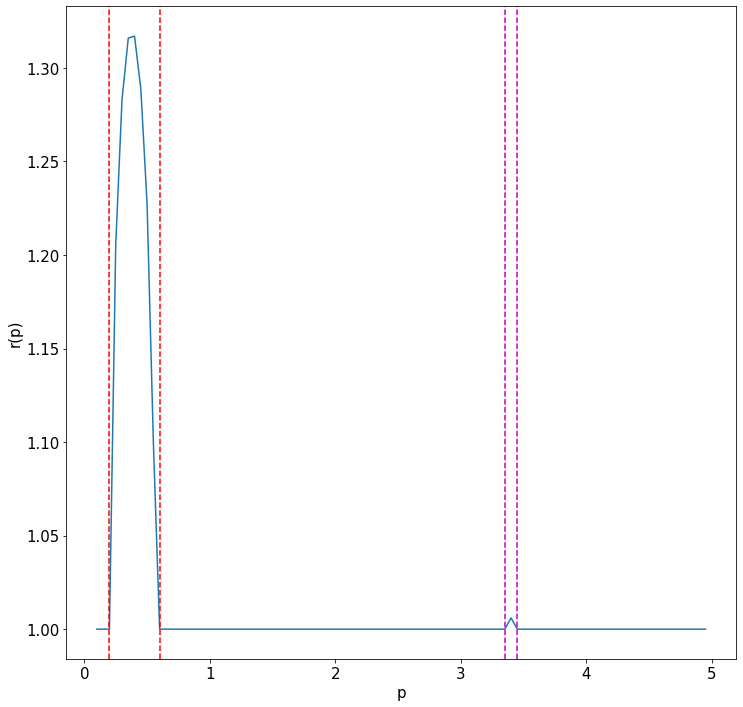

In [50]:
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams.update({'font.size': 15})
plt.xlabel("p")
plt.ylabel("r(p)")
plt.plot(array_of_p, r)
plt.axvline(x=p_0[0], color='red', linestyle='dashed')
plt.axvline(x=p_0[1], color='red', linestyle='dashed')
plt.axvline(x=p_0[2], color='m', linestyle='dashed')
plt.axvline(x=p_0[3], color='m', linestyle='dashed')
plt.show()

Следовательно на интервалах $[0.1, 0.2], [0.6, 3.35]$ и $[3.45,5]$ система устойчива, а на $(0.2,0.6)$ и $(3.35,3.45)$ не устойчива.

## Выводы

Исследована устойчивость однородного линейного уравнения с периодическими коэффициентами. Была построена основная матрица, затем найден спектральный радиус для различных значений параметра p. Система оказалось не устойчива на двух интервалах: возле нуля длиной 0.4 и возле 3.4 длиной 0.1.